In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Motivating Example

- What does it mean for a random process to remain the "same" over time? Obviously, the exact values will be different, since the process is random. The notion of a "stationary process" makes this notion precise.

## Theory

- **Definition 53.1 (Stationary Process)**: A process $\{ X(t) \}$ is **strict-sense stationary** if it is completely invariant under time shifts
    - That is, the distribution $X(1), X(2), ... X(t)$ is equivalent to the distribution $X(1+r), X(2+r), ... X(t+r)$ for any value of $r$. This is when
        - $\mu_X(t) = \mu_X$
        - $\sigma_X(t)^2 = \sigma_X^2$
        - $Cov[t,s] = Cov[t-s]$
        - Joint distribution $P(X(t), X(s)) = P(X(t+r), X(s+r))$ is constant for all values of $r$

- Processes can also be **wide-sense stationary**, which is considered a less restrictive condition. This is true when:
    - Mean function $\mu_X(t)$ is constant, so $\mu_X(t) = \mu_X$
    - Variance function $\sigma_X(t)$ is constant, so $\sigma_X(t) = \sigma_X$
    - Autocovariance function $C_X(s,t)$ only depends on $s-t$, so $C_X(s,t) = C_X(s-t)$ in the continuous case, and $C_X[m,n] = C_X[m-n]$ in the discrete case
        - This means that the covariance between any 2 time points depends only on the distance between the points
    - BUT the last condition (where joint distribution does not change) is not met

## Example

### Example 53.1 (Random Amplitude Process)

- Consider the random amplitude process introduced in example 48.1 $$X(t) = A \cos(2 \pi ft)$$ 
- In example 50.1, we showed that $$\mu_X(t) = 2.5 \cos(2\pi ft)$$ 
- This shows that the expectation is not constant in $t$, so the process $X(t)$ cannot be stationary

- One very informal way to test whether if a process is stationary is to replace $t$ with some function of $t$ (e.g. $t-1$)
    - Plotting $X(t)$ and $X(t-1)$, we can see clearly that the processes look very different
    - This is NOT a definite test, more of an intuition check

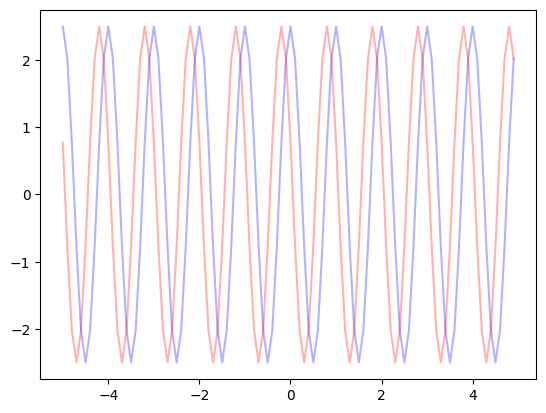

In [10]:
tvals = np.arange(-5, 5, 0.1)
plt.plot(tvals, 2.5 * np.cos(2*np.pi*tvals), alpha=0.3, color='blue')
plt.plot(tvals, 2.5 * np.cos(2*np.pi*(tvals+0.2)), alpha=0.3, color='red')

### Example 53.2 (Poisson Process)

- Consider the Poisson process $\{ N(t); t \ge 0 \}$ of rate $\lambda$, defined in Example 47.1. 
- In Example 50.2, we showed that the mean function of a Poisson process $\mu_N(t) = \lambda \cdot t$
- Again, the mean function is dependent on $t$, so the Poisson process is not stationary
- Let's do the informal plotting check again



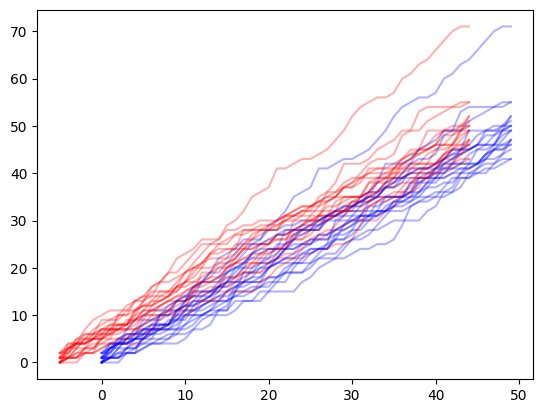

In [16]:
instantiations = np.array([np.random.poisson(1, size=50).cumsum() for _ in range(20)])
tvals = np.arange(0,50,1)
for i in range(20):
    plt.plot(tvals, instantiations[i], alpha=0.3, color='blue')
    plt.plot(tvals-5, instantiations[i], alpha=0.3, color='red')

### Example 53.3 (White Noise)

- Consider the white noise process $\{Z[n]\}$ defined in Example 47.2, which consists of i.i.d. random variables with mean $\mu = E[Z[n]]$ and variance $\sigma^2 = Var[Z[n]]$
- We showed in Example 50.3 that $\mu_Z[n] = \mu_Z$
- We showed in Example 52.3 that $C_Z[m,n] = \delta[m-n]\sigma^2$, where $\delta[k] = \begin{Bmatrix} 1 & k = 0 \\ 0 & k \neq 0 \end{Bmatrix}$
- Hence, white noise process is **stationary**

- Visual "proof" shows that stationarity is sensible

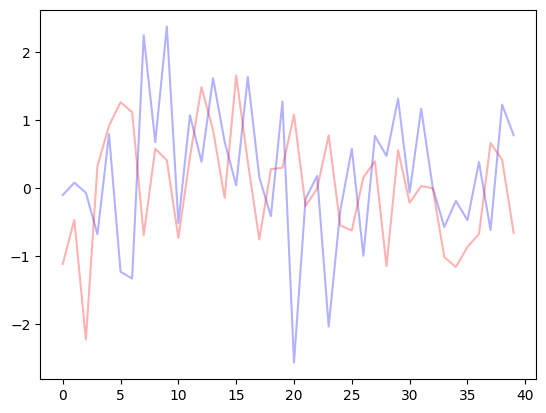

In [23]:
tvals = np.arange(0,40,1)
zvals = np.random.normal(0,1,size=40)
zvals_shift = np.random.normal(0,1,size=40)
plt.plot(tvals, zvals, alpha=0.3, color='blue')
plt.plot(tvals, zvals_shift, alpha=0.3, color='red')

### Example 53.4 (Random Walk)

- Consider the random walk process $\{ X[n]; n \ge 0 \}$ from Example 47.3.
- In Example 50.4, we found that $\mu[n] = 0$
- In Example 52.4, we found that $C[m,n] = \text{min}(m,n)Var[Z[1]]$
- So $Cov[m,n]$ depends on more than just $m-n$, hence is it **NOT** wide sense stationary

### Example 53.5

- Let $\{X(t)\}$ be a continuous time random process
    - $E[X(t)] = 2$ for all $t$
    - $Cov[X(s), X(t)] = 5 e^{-3 (s-t)^2}$ for all $s$ and $t$

- Is this a stationary function?   
    - Yes clearly, $E[X(t)]$ doesn't depend on $t$, and $Cov[X(s), X(t)]$ is a function of $s-t$